In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Cargar el archivo CSV
# file_path = 'data/sales_data.csv'
# file_path = 'data/INFORMES_LIBRERIA/nuevo.csv'
file_path = 'data/informe_cierres_caja.xlsx'
data = pd.read_excel(file_path)

# Verificar las primeras filas para confirmar la lectura correcta
print(data.head())

   caja_numero      fecha_apertura        fecha_cierre   estado  \
0            1 2020-10-26 09:02:00 2020-10-27 08:36:00  CERRADA   
1            2 2020-10-27 08:40:00 2020-10-27 18:12:00  CERRADA   
2            3 2020-10-28 09:12:00 2020-10-28 18:16:00  CERRADA   
3            4 2020-10-29 09:09:00 2020-10-29 18:20:00  CERRADA   
4            5 2020-10-30 08:57:00 2020-10-30 18:18:00  CERRADA   

  monto_apertura monto_diferencia diferencia          responsable  
0         465,25          2424,34      75,66  Administrador Total  
1         462,25          8290,25    2969,75  Administrador Total  
2         462,25          4241,07    3138,93  Administrador Total  
3         462,25          5427,25    2915,75  Administrador Total  
4         460,25          5196,01    1853,99  Administrador Total  


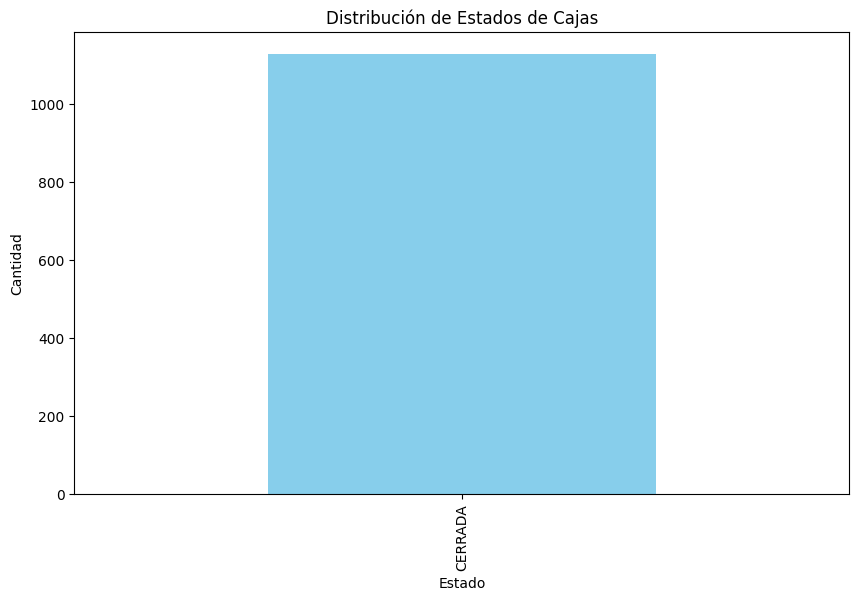

In [5]:
# Ejemplo 1: Distribución de Estados
estado_counts = data['estado'].value_counts()
estado_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución de Estados de Cajas')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

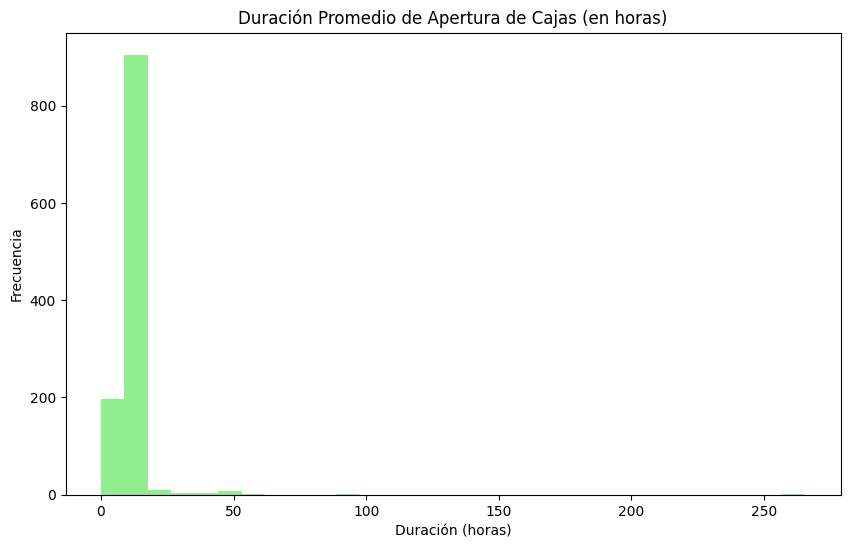

In [6]:
# Ejemplo 2: Duración Promedio de Apertura de Cajas
data['Duracion_Apertura'] = (data['fecha_cierre'] - data['fecha_apertura']).dt.total_seconds() / 3600
data['Duracion_Apertura'].plot(kind='hist', bins=30, figsize=(10, 6), color='lightgreen')
plt.title('Duración Promedio de Apertura de Cajas (en horas)')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Ejemplo 3: Monto Total de Apertura y Diferencia por Día
# data['FechaApertura_Dia'] = data['fecha_apertura'].dt.date
# daily_totals = data.groupby('FechaApertura_Dia')[['monto_apertura', 'monto_diferencia']].sum()
# daily_totals.plot(kind='bar', figsize=(15, 7), color=['blue', 'red'])
# plt.title('Monto Total de Apertura y Diferencia por Día')
# plt.xlabel('Fecha')
# plt.ylabel('Monto')
# plt.show()

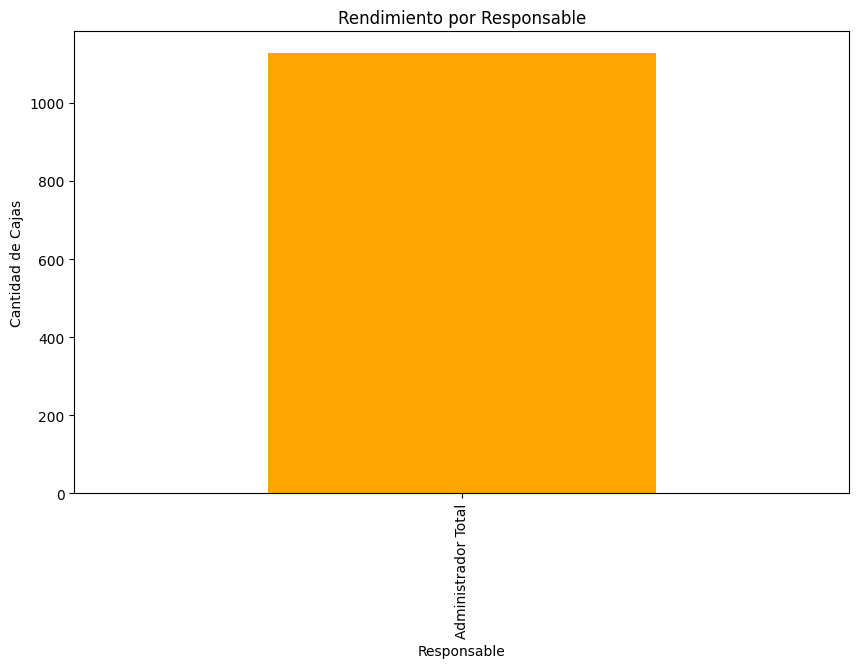

In [8]:
# Ejemplo 4: Rendimiento por Responsable
responsable_counts = data['responsable'].value_counts()
responsable_counts.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Rendimiento por Responsable')
plt.xlabel('Responsable')
plt.ylabel('Cantidad de Cajas')
plt.show()

In [ ]:
# Ejemplo 5: Análisis de Monto Diferencia por Responsable
# sns.boxplot(x='responsable', y='monto_diferencia', data=data, palette='Set3', figsize=(15, 7))
# plt.title('Distribución de Monto Diferencia por Responsable')
# plt.xlabel('Responsable')
# plt.ylabel('Monto Diferencia')
# plt.xticks(rotation=45)
# plt.show()

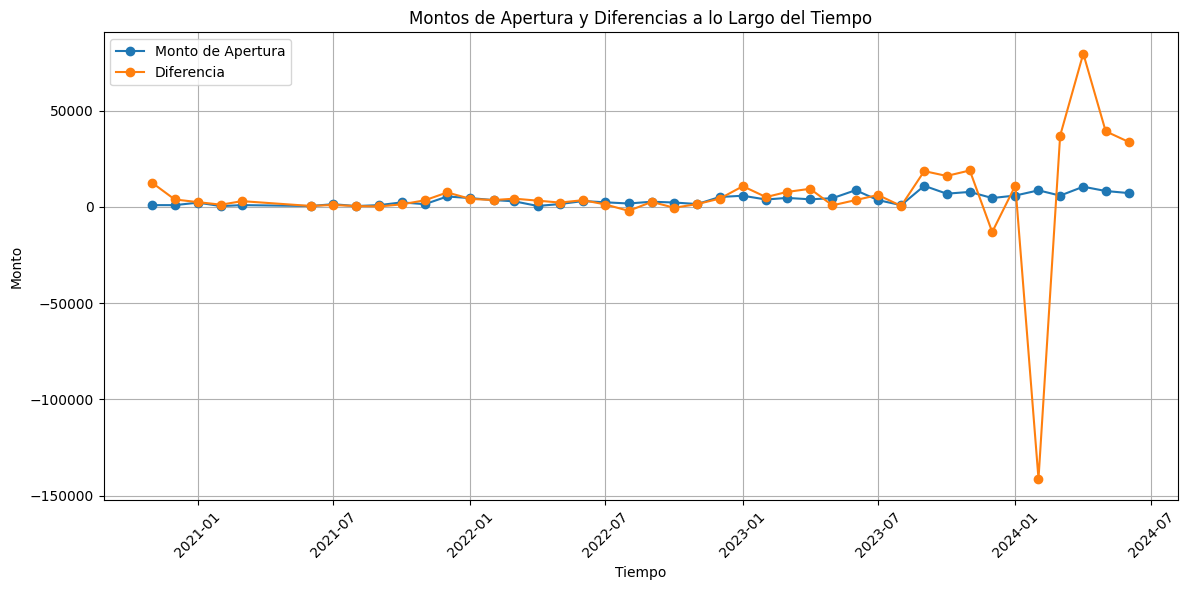

In [12]:
# Crear el Gráfico de Líneas:
# Grafica los montos de apertura y las diferencias a lo largo del tiempo

# convertir las columnas de fecha al tipo datetime
data['fecha_apertura'] = pd.to_datetime(data['fecha_apertura'])
data['fecha_cierre'] = pd.to_datetime(data['fecha_cierre'])

# Asegurarse de que las columnas monto_apertura y diferencia sean numéricas
data['monto_apertura'] = pd.to_numeric(data['monto_apertura'], errors='coerce')
data['diferencia'] = pd.to_numeric(data['diferencia'], errors='coerce')

# Eliminar filas con NaN en monto_apertura o diferencia si es necesario
data.dropna(subset=['monto_apertura', 'diferencia'], inplace=True)

# Agrupar por mes y año, calculando la suma de los montos de apertura y diferencias
data['mes_anio'] = data['fecha_apertura'].dt.to_period('M')
monthly_data = data.groupby('mes_anio').agg({'monto_apertura': 'sum', 'diferencia': 'sum'}).reset_index()

# Convertir la columna 'mes_anio' a formato datetime para facilitar la plot
monthly_data['mes_anio'] = monthly_data['mes_anio'].dt.to_timestamp()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['mes_anio'], monthly_data['monto_apertura'], label='Monto de Apertura', marker='o')
plt.plot(monthly_data['mes_anio'], monthly_data['diferencia'], label='Diferencia', marker='o')

# Agregar etiquetas y título
plt.title('Montos de Apertura y Diferencias a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Monto')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()